In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
data = pd.read_csv("data.csv",header=None)

In [3]:
data = data.sample(frac=1)
input_dim = len(data.columns) - 1

In [4]:
data = data.astype("float32")

In [5]:
data = data.to_numpy()

In [6]:
data.shape

(4169, 257)

In [42]:
training = data[0:3200]
validating = data[3200:3500]
testing = data[3500:]

In [43]:
print(training.shape)
print(validating.shape)
print(testing.shape)

(3200, 257)
(300, 257)
(669, 257)


In [44]:
training_features = training[:,0:-1]
training_labels = training[:,-1]

In [45]:
print(training_features.shape)
print(training_labels.shape)

(3200, 256)
(3200,)


In [46]:
testing_features = testing[:,0:-1]
testing_labels = testing[:,-1]

In [47]:
print(testing_features.shape)
print(testing_labels.shape)

(669, 256)
(669,)


In [48]:
validating_features = validating[:,0:-1]
validating_labels = validating[:,-1]

In [49]:
print(validating_features.shape)
print(validating_labels.shape)

(300, 256)
(300,)


In [126]:
input_dim=256
model = Sequential([
# layers.Input(shape=(256,)),
layers.Dense(32, input_dim = input_dim , activation = 'relu'),
layers.Dense(32, input_dim = input_dim , activation = 'relu'),
layers.Dense(32, input_dim = input_dim , activation = 'relu'),
layers.Dense(32, input_dim = input_dim , activation = 'relu'),
layers.Dense(64, input_dim = input_dim , activation = 'relu'),
layers.Dense(64, input_dim = input_dim , activation = 'relu'),
layers.Dense(64, input_dim = input_dim , activation = 'relu'),
layers.Dense(64, input_dim = input_dim , activation = 'relu'),
layers.Dense(64, input_dim = input_dim , activation = 'relu'),
layers.Dense(64, input_dim = input_dim , activation = 'relu'),
layers.Dense(64, input_dim = input_dim , activation = 'relu'),
layers.Dense(64, input_dim = input_dim , activation = 'relu'),
layers.Dense(64, input_dim = input_dim , activation = 'relu'),
layers.Dense(64, input_dim = input_dim , activation = 'relu'),
layers.Dense(64, input_dim = input_dim , activation = 'relu'),
layers.Dense(128, input_dim = input_dim , activation = 'relu'),
layers.Dense(128, input_dim = input_dim , activation = 'relu'),
layers.Dense(128, input_dim = input_dim , activation = 'relu'),
layers.Dense(512, input_dim = input_dim , activation = 'relu'),
layers.Dense(5, activation='softmax')
    
])

In [127]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])

In [128]:
epochs = 50
history = model.fit(training_features,training_labels,
                    epochs=epochs,
                    validation_data=(validating_features,validating_labels), callbacks=[model_checkpoint_callback])

Epoch 1/50
100/100 [==============================] - 2s 10ms/step - loss: 1.1310 - accuracy: 0.5288 - val_loss: 0.8174 - val_accuracy: 0.6633
Epoch 2/50
100/100 [==============================] - 1s 8ms/step - loss: 0.7589 - accuracy: 0.7128 - val_loss: 0.6706 - val_accuracy: 0.7433
Epoch 3/50
100/100 [==============================] - 1s 8ms/step - loss: 0.5699 - accuracy: 0.7722 - val_loss: 0.5381 - val_accuracy: 0.7967
Epoch 4/50
100/100 [==============================] - 1s 8ms/step - loss: 0.5652 - accuracy: 0.7928 - val_loss: 0.4453 - val_accuracy: 0.8333
Epoch 5/50
100/100 [==============================] - 1s 7ms/step - loss: 0.5242 - accuracy: 0.8069 - val_loss: 0.4314 - val_accuracy: 0.8100
Epoch 6/50
100/100 [==============================] - 1s 8ms/step - loss: 0.4774 - accuracy: 0.8156 - val_loss: 0.4848 - val_accuracy: 0.8633
Epoch 7/50
100/100 [==============================] - 1s 7ms/step - loss: 0.3800 - accuracy: 0.8519 - val_loss: 0.3198 - val_accuracy: 0.8633
Epoch

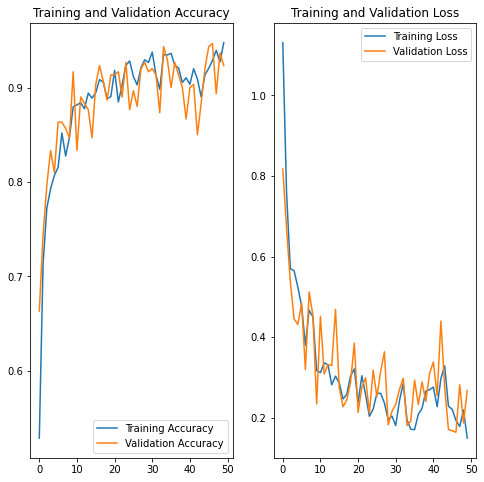

In [130]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [129]:
model.load_weights(checkpoint_filepath)
results = model.evaluate(testing_features, testing_labels)
print("test loss, test acc:", results)
np.set_printoptions(suppress=True)

# muszlowy - 0
# gothic - 1
# york - 2
# light - 3
# barwy_jesieni - 4

predictions = model.predict(testing_features[10:20])

print("\nRzeczywiste wartości: ",testing_labels[10:20].astype("int32"))
print("Przewidziane wartości:",np.argmax(predictions, axis=1))

21/21 [==============================] - 0s 4ms/step - loss: 0.2259 - accuracy: 0.9327
test loss, test acc: [0.2258996218442917, 0.9327354431152344]
1/1 [==============================] - 0s 160ms/step

Rzeczywiste wartości:  [4 4 1 1 2 2 2 1 3 2]
Przewidziane wartości: [4 4 1 1 2 2 2 1 3 2]


In [110]:
model.save('bruk_deep_learning_4')

INFO:tensorflow:Assets written to: bruk_deep_learning_4/assets
